<h1><center>Laboratorio 4: El Pandas no muerde (act. I) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Maximiliano Westerhout Aliste
- Nombre de alumno 2: Álvaro Gallardo Alvarado


### **Link de repositorio de GitHub:** `https://github.com/MaxWesterhout/Lab-4-Programacion-Cientifica.git.`

### Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **Ausentes tienen nota máxima 6.0**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px

# Librerias utiles
from sklearn.preprocessing import StandardScaler

# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos.
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados.




In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = "/content/drive/MyDrive/students_grades.json"
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


## 1.1 Carga e Inspección de Datos [1.5 Puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>


*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset.


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [ ]:
df_grades = pd.read_json(r"/content/drive/MyDrive/students_grades.json")
df_grades['math score'] = pd.to_numeric(df_grades['math score'])
df_grades['reading score'] = pd.to_numeric(df_grades['reading score'])
df_grades['writing score'] = pd.to_numeric(df_grades['writing score'])
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0
...,...,...,...,...,...,...,...,...,...
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0



<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **1000** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **1000** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier alumno que posea un valor diferente a esta escala, debería ser eliminado de la base de datos.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas.

**To-Do**
1. [ ] Imprimir un mensaje con las dimensiones del Dataframe.
2. [ ] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [ ] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [ ] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [ ] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [ ] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [ ] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [ ] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).
9. [ ] A traves de `.plot.box()` plotear el boxplot de las notas. De ser necesario, invetigue como funcionan los gráficos de caja (esta sección es provista).
10. [ ] Finalmente responda la siguiente pregunta:

> ¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot? (), comente esto en la celda ubicada debajo de **justificación**.

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c)

**Respuesta:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def exploratory_data_analysis(df_grades):
    # Imprimir las dimensiones del df_grades
    print("El dataframe tiene", df_grades.shape[0],"filas y", df_grades.shape[1],"columnas" )
    print("")
    # Imprimir los nombres de las columnas
    print("El datafrarme esta compuesto por los siguientes Nombres de las columnas:",df_grades.columns.values)
    print("")
    # Mostrar los primeros 5 elementos del dataset
    print("Ejemplos de filas del DataFrame:")
    print("")
    print("Primeros 5 elementos:")
    display(df_grades.head())
    print("")
    # Mostrar los últimos 5 elementos del dataset
    print("Últimos 5 elementos:")
    display(df_grades.tail())
    print("")
    # Mostrar una muestra aleatoria de 5 elementos del dataset
    print("Muestra aleatoria de 5 elementos:")
    display(df_grades.sample(5))
    print("")
    # Descripción rápida de las variables numéricas
    print("Descripción de variables numéricas:")
    display(df_grades.describe())
    print("")
    # Cantidad de valores nulos por columna
    print("Cantidad de valores nulos por columna:")
    print(df_grades.isna().sum())
    print("")
    # Cantidad de valores únicos por columna
    print("Cantidad de valores únicos por columna:")
    print(df_grades.nunique())
    print("")
    # Total de filas con nombres duplicados
    duplicate_rows = df_grades[df_grades.duplicated(subset='names')]
    print("Presenta un total de", len(duplicate_rows),"filas con nombres duplicados")
    print("")
    # Filas con nombres duplicados
    print("Filas con nombres duplicados:")
    display(duplicate_rows)

    # Boxplot de las notas
    df_grades.boxplot(column=['math score', 'reading score','writing score'])
    plt.title('Boxplot de las Notas')
    plt.xlabel('Materias')
    plt.ylabel('Puntuación')
    plt.show()

El dataframe tiene 1400 filas y 9 columnas

El datafrarme esta compuesto por los siguientes Nombres de las columnas: ['names' 'gender' 'race/ethnicity' 'parental level of education' 'lunch'
 'test preparation course' 'math score' 'reading score' 'writing score']

Ejemplos de filas del DataFrame:

Primeros 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0



Últimos 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0



Muestra aleatoria de 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
171,Judith Foster,female,group C,bachelor's degree,standard,none,83.0,93.0,95.0
1052,John Schoolfield,male,group C,high school,standard,none,68.0,60.0,53.0
853,Paul Hyder,male,group D,master's degree,standard,none,95.0,81.0,84.0
1372,Steven Hacker,male,group A,some high school,free/reduced,none,65.0,59.0,53.0
1358,Hannah Harrison,female,group A,associate's degree,standard,completed,124.0,NaN,193.0



Descripción de variables numéricas:


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000



Cantidad de valores nulos por columna:
names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64

Cantidad de valores únicos por columna:
names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64

Presenta un total de 247 filas con nombres duplicados

Filas con nombres duplicados:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0


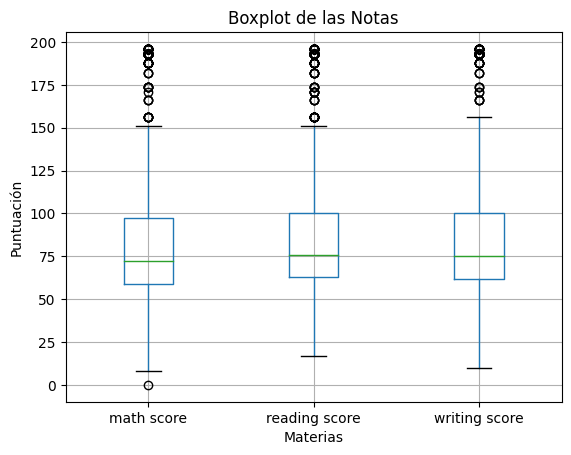

In [ ]:
exploratory_data_analysis(df_grades)

**Justificación:**

```
Escriba aquí su justificación

Dentro de las anomalías detectadas en los datos la primera se puede ver en dimensión, ya que se menciona que se tienen 1000 matrículas y existen 1400 registros, por ende esto nos muestra que puede haber diferentes malas prácticas en la base de datos.

Otra anomalía que se vio fue al observar las columnas numéricas math score, reading score y writing score, puesto que estas poseen valores nulos, especificamente 40, 40 y 47 valores faltantes respectivamente.

También se puede ver que en las 3 columnas numéricas existe como máximo 196, sin embargo la escala de puntajes va de 0 a 100, mostrando que existen registros con valores mal ingresados en el puntaje de las pruebas. Esto además se evidencia en los boxplot del final, en los cuales se pueden ver una gran cantidad de outliers que estan fuera del rango de dichos puntajes.

Finalmente se puede ver que en este caso existen 247 valores con nombres duplicados, lo cual no posee sentido ya que contienen la misma información generando un gasto innecesario de memoria y complicando la base de datos.

```

## 1.2 Limpieza de Datos [1 punto]

<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>


En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y cree una función que le permita limpiar los datos. Habiendo limpiado el `DataFrame`, compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**

- [ ] Crear función que permita limpiar el dataset.
- [ ] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hint**

Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.


**Respuesta:**

In [ ]:
def clean_data(df_grades):
    df_grades = df_grades[(df_grades['math score'] >= 0) & (df_grades['math score'] <= 100)]
    df_grades = df_grades[(df_grades['reading score'] >= 0) & (df_grades['reading score'] <= 100)]
    df_grades = df_grades[(df_grades['writing score'] >= 0) & (df_grades['writing score'] <= 100)]
    # Elimina duplicados
    df_grades = df_grades.drop_duplicates()
    # Elimina filas con valores nulos
    df_grades = df_grades.dropna()
    return df_grades

In [ ]:
df_grades = clean_data(df_grades)

> Utilice la función creada en el punto 1.1 para verificar sus resultados.

El dataframe tiene 1000 filas y 9 columnas

El datafrarme esta compuesto por los siguientes Nombres de las columnas: ['names' 'gender' 'race/ethnicity' 'parental level of education' 'lunch'
 'test preparation course' 'math score' 'reading score' 'writing score']

Ejemplos de filas del DataFrame:

Primeros 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0



Últimos 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0



Muestra aleatoria de 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
311,Gerald Brunner,male,group D,high school,standard,none,46.0,34.0,36.0
1374,Manuel Glover,male,group D,some college,standard,none,88.0,73.0,78.0
408,Viola Santiago,female,group D,master's degree,standard,none,62.0,70.0,75.0
663,Thomas Simmons,male,group C,bachelor's degree,standard,completed,94.0,90.0,91.0
1324,Wendy Freel,female,group C,some high school,standard,completed,65.0,74.0,77.0



Descripción de variables numéricas:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Cantidad de valores nulos por columna:
names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Cantidad de valores únicos por columna:
names                          1000
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       81
reading score                    72
writing score                    77
dtype: int64

Presenta un total de 0 filas con nombres duplicados

Filas con nombres duplicados:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


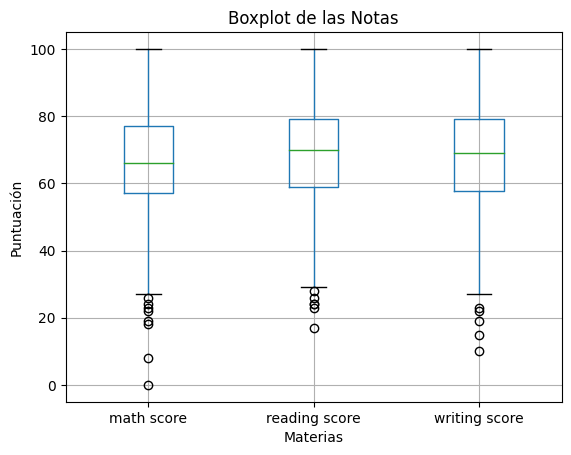

In [ ]:
exploratory_data_analysis(df_grades)

**Justificación:**

```
Escriba aquí su justificación

Al ovservar estos resultados se tiene que el numero de filas ahora calza con el valor esperado de 1000, en donde se tiene una reduccion de 400 filas efectivo. De dicha reduccion, no existen valores repetidos presentes en ninguna columna al igual que existen 1000 valores unicos en la columna names, que es en si un sinonimo del resultado anterior. Por todo esto, se concluye que se realizo una limpieza efectiva dado que no existen elementos repetidos al igual que el numero de filas es el esparado, por ello mismo no se elimnaron elementos no repetidos en el proceso.

```

## 1.3 Trabajando con Datos

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 1.3.1 Transformación de notas a "Nota Chilena" [0.5 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas del dataframe y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [ ] Tranforme los valores a la escala chilena.

**Respuesta:**

In [ ]:
def nota_chilena(dataframe_in, columna):
  #Se toma la columna en custion
  nota_normal = dataframe_in[str(columna)]
  #Se aplica transformacion
  nota_chilena = nota_normal*0.06 + 1
  #Se reemplazan los nuevos valores
  dataframe_in[str(columna)]= nota_chilena
  #Se retorna el dataframe
  return dataframe_in

In [ ]:
nota_chilena(df_grades, "math score")

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,5.38,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,86.0,87.0
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,61.0,62.0


In [ ]:
nota_chilena(df_grades, "reading score")

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,81.0
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,87.0
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,62.0


In [ ]:
nota_chilena(df_grades, "writing score")

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


### 1.3.2 Obtención de promedio de alumnos [0.5]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del `DataFrame` original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [ ] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el `DataFrame` original.


**Respuesta:**

In [ ]:
def alumnos_promedio(df_grades):
  #Se aplica promedio
  promedio = (df_grades["math score"] + df_grades["reading score"] + df_grades["writing score"]) / 3
  #Se redondea a 2
  promedio_redondeado = round(promedio,2)
  #Se reemplazan los valores
  df_grades["promedio"] = promedio_redondeado
  #Se retorna el dataframe
  return df_grades

**Respuesta Esperada:**

In [ ]:
df_grades = alumnos_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,promedio
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


In [ ]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,promedio
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


### 1.3.3 Reprobados y Destacados [1.5 Punto, 0.5 Cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes:
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [ ] Obtener DataFrame con los alumnos que reprobaron el año.
- [ ] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [ ] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [ ]:
def reprobados_destacados(dataframe_in):
    #Alumnxs reprobados
    df_reprobados = dataframe_in[dataframe_in['promedio']<4.0] #Mascara promedio menor a 4
    df_reprobados = df_reprobados.reset_index().drop(['index'],axis=1) #Reseteo indices
    #Alumnxs reprobados y aprobados
    df_reprobados_y_aprobados = dataframe_in.copy()
    df_reprobados_y_aprobados.loc[df_reprobados_y_aprobados['promedio']<4.0,'promedio'] = 'R' #Se reemplazan las filas con nota menor a 4
    df_reprobados_y_aprobados = df_reprobados_y_aprobados.reset_index().drop(['index'],axis=1) #Reseteo indices
    #Alumnxs destacados
    df_destacados = dataframe_in[(dataframe_in['math score']>=5.8) & (dataframe_in['reading score']>=5.8) & (dataframe_in['writing score']>=5.8)].sort_values("promedio", ascending=False).reset_index().drop(['index'],axis=1) #Se aplica mascara de las 3 columnas y se ordenan los datos
    #Se retornan los tres dataframes
    return (df_reprobados,df_reprobados_y_aprobados,df_destacados)

In [ ]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)
dataframe1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,promedio
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
2,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
3,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
4,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
98,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
99,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
100,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
101,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [ ]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,promedio
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.3
996,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
998,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [ ]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,promedio
0,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.00,7.00,7.00
1,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.00,7.00,7.00
2,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.00,7.00,7.00
3,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.00,7.00,6.98
4,Angela Cressey,female,group D,some college,standard,none,6.88,7.00,6.94,6.94
...,...,...,...,...,...,...,...,...,...,...
116,Katrina Wilcox,female,group E,bachelor's degree,standard,none,5.80,5.98,5.98,5.92
117,Harry Berry,male,group B,associate's degree,standard,completed,5.86,5.92,5.92,5.90
118,Paul Brownell,male,group B,high school,standard,none,5.92,5.92,5.80,5.88
119,James Daniel,male,group C,associate's degree,standard,none,6.04,5.80,5.80,5.88


**Respuesta:**

```
Escriba aqui su respuesta

La justificaciond de la creacion de dataframes y del proceso de enmascarado esta presente en los comentarios de la funcion. Los resultados muestran que existen 103 de los 1000 estudiantes los cuales reprobaron y 121 que son destacados. Basta simplemente con observar el numero de columnas de los dataframes resultantes para obtener dichos resultados.
```

### 1.3.4 Consultas de Alumnos [0.5 Puntos]

Algunos padres (extremadamente entrometidos y...) preocupados por el desempeño de sus hijos, desean saber estos han aprobado o no el año. Como la tarea de buscar a mano cada uno de estos alumnos en el `DataFrame` resulta demasiado tedioso, el rector le solicita crear una función que tenga como entrada el `DataFrame` donde se realizará la busqueda y una lista con los nombres de los alumnos, luego la función deberá retornar un `DataFrame` con los nombres de los alumnos y el promedio general de cada uno.

Creada la función busque el promedio general de los siguientes alumnos en el segundo Data frame creado en la sección 1.3.3:

`['Lucille Stanphill','Marcus Mcfarland', 'Matthew Freeman', 'Dana Mojica', 'Paul Hyder', 'Jeffrey Korn', 'Robert Strain',
'Ronald Jett', 'Lorena Reed', 'Hazel Posey']`

**Hint:** Puede serle de utilidad utilizar `isin()`.

**Respuesta:**

In [ ]:
def consulta_gpa(dataframe_in, lista_alumnos):
    mask = dataframe_in[dataframe_in['names'].isin(lista_alumnos)]
    return mask[['names','promedio']]

lista_alumnos = [
    "Lucille Stanphill",
    "Marcus Mcfarland",
    "Matthew Freeman",
    "Dana Mojica",
    "Paul Hyder",
    "Jeffrey Korn",
    "Robert Strain",
    "Ronald Jett",
    "Lorena Reed",
    "Hazel Posey",
]
consulta_gpa(dataframe2, lista_alumnos)

,names,promedio
203,Lucille Stanphill,5.94
396,Marcus Mcfarland,4.86
446,Matthew Freeman,R
449,Dana Mojica,R
604,Paul Hyder,6.2
647,Jeffrey Korn,4.54
748,Robert Strain,4.4
752,Ronald Jett,R
754,Hazel Posey,R
849,Lorena Reed,R


### 1.3.5 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [ ]:
df_grades.rename(columns={'promedio':'GPA'},inplace= True)
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [ ]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [ ]:
# Código para quintiles
# La variable que contenga los quintiles debe llamarse GPA cuantiles para que el gráfico funcione.

cuantiles = pd.qcut(
    df_grades["GPA"],
    q=5,
    labels=['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])

df_grades['GPA cuantiles'] = cuantiles

# Código de gráfico
fig = px.scatter(
    df_grades.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig

```
Escriba aqui su respuesta

El grafico resultante muestra que los rangos de cada cuartil para cada nivel educacional varian, en donde los estudiantes que tienen padres con nivel de "master" poseen un rango cuartil inferior mayor al resto de los niveles teniendo un orden ascendente desde el nivel mas bajo, esto se traduce en que los estudiantes con padres con niveles educacionales superiores tienden a tener GPA mayores a los valores mas bajos de los niveles inferiores, basicamente la brecha inferior de GPA o la base de los niveles educacioneles superiores es mayor que los niveles que los anteceden (lxs estudiantes que tienen familias con mayor nivel tienden a tener un GPA base mayor).

Referido a los resultados los cuartiles superiores y medios no hay mucho que decir, la media al igual que la mediana es basicamente la misma y todos los niveles presentan cuartiles superiores en los valores de GPA mayores de (5.8 a 7), cabe destacar que los unicos niveles con GPA igual a 7 son bachelors y associates, los cuales no son directamente los niveles mayores.

```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://gifdb.com/images/high/orange-cat-cat-walking-with-two-legs-xlgf7qx4i24da74f.gif" width="400">
</p>


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>